##A Large Example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
# read in the insurance dataset
insurance = pd.read_csv("/content/drive/MyDrive/01_Reg_Data_Sample/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Let's try one-hot encode our DataFrame so it's all numbers

insurance_one_hot= pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]


In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [ ]:
def myfunc(X):
  X = tf.convert_to_tensor(X, dtype=tf.float32)
  return X

In [ ]:
# View y
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
def newfunc(y):
  y = tf.convert_to_tensor(y, dtype=tf.float32)
  return y

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test),len(y), len(y_train), len(y_test)

(1338, 1070, 268, 1338, 1070, 268)

###Create the first neural network model

In [ ]:
# Build a neural network
tf.random.set_seed(42)
# Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model
insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                        metrics = ["mae"])
# Fit the model
insurance_model.fit(X, y, epochs=300)

Epoch 1/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 13156.9209 - mae: 13156.9209
Epoch 2/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12298.7061 - mae: 12298.7061
Epoch 3/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8651.8418 - mae: 8651.8418
Epoch 4/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7383.6406 - mae: 7383.6406
Epoch 5/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7317.9780 - mae: 7317.9780
Epoch 6/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7245.1064 - mae: 7245.1064
Epoch 7/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7164.7134 - mae: 7164.7134
Epoch 8/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7084.2642 - mae: 7084.2642
Epoch 9/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6998.3242 - mae: 6998.3242
Epoch 10/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6911.3682 - mae: 6911.3682
Epoch 11/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6818.0786 - mae: 6818.0786
Epoch 12/300
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

In [ ]:
# Check the results of the insurance data on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 3203.8010 - mae: 3203.8010


[3147.039794921875, 3147.039794921875]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

## Looks like the model isn't performing well, so we need to improve it!

To try to improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and used the Adam optimizer
2. (Same as above)Train for longer (epochs=200)
3. Insert your own experiment here : remove training later?

###Create Model 2

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
insurance_model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=["mae"])

# fit the model

insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 12695.4756 - mae: 12695.4756
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7596.5513 - mae: 7596.5513
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7258.6133 - mae: 7258.6133
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7048.4810 - mae: 7048.4810
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6771.5220 - mae: 6771.5220
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6426.6357 - mae: 6426.6357
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6251.6475 - mae: 6251.6475
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6130.8843 - mae: 6130.8843
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5980.2993 - mae: 5980.2993
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5795.5615 - mae: 5795.5615
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5539.9883 - mae: 5539.9883
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

In [ ]:
# Evaluate the larger model

insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 3225.7224 - mae: 3225.7224


[3166.775146484375, 3166.775146484375]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3203.8010 - mae: 3203.8010 


[3147.039794921875, 3147.039794921875]

###Create Model 3

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create another model
insurance_model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model
insurance_model_3.compile(loss= tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
# Fit the model

history= insurance_model_3.fit(X_train,y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 13268.0273 - mae: 13268.0273
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13128.0195 - mae: 13128.0195
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12835.9111 - mae: 12835.9111
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12242.6924 - mae: 12242.6924
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11198.5742 - mae: 11198.5742
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9760.6602 - mae: 9760.6602
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8315.6475 - mae: 8315.6475
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7497.2026 - mae: 7497.2026
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7361.6113 - mae: 7361.6113
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7334.8198 - mae: 7334.8198
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7313.5498 - mae: 7313.5498
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
# Evaluate
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3468.7070 - mae: 3468.7070


[3403.03759765625, 3403.03759765625]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3203.8010 - mae: 3203.8010 


[3147.039794921875, 3147.039794921875]

Text(0.5, 0, 'epochs')

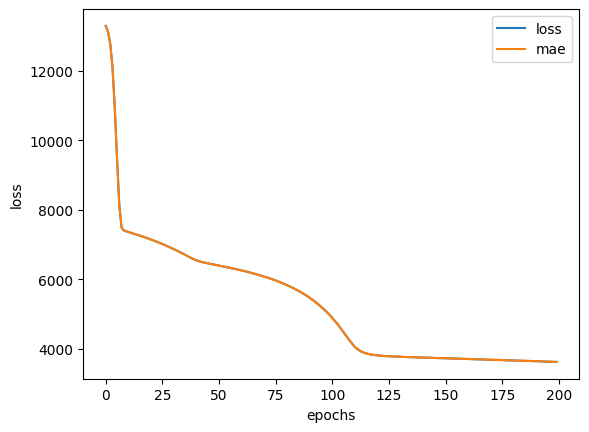

In [ ]:
# Plot History (known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

##Preprocessing data (normalization and standardization)
In terms of scaling values, neural networks tend to prefer normalization. Read: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

If not sure which to use, will try both and see which performs better.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance DataFrame

insurance=pd.read_csv("/content/drive/MyDrive/01_Reg_Data_Sample/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##Visualise the Data

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


<Axes: ylabel='Frequency'>

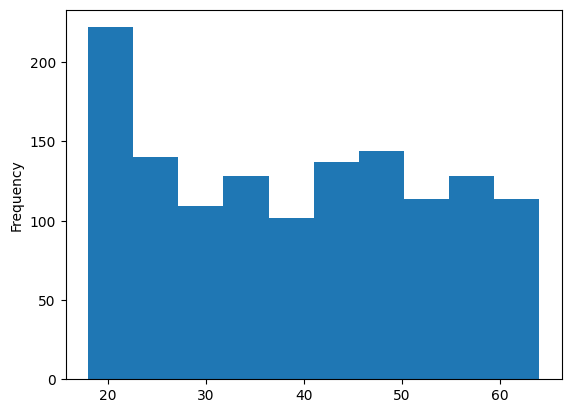

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

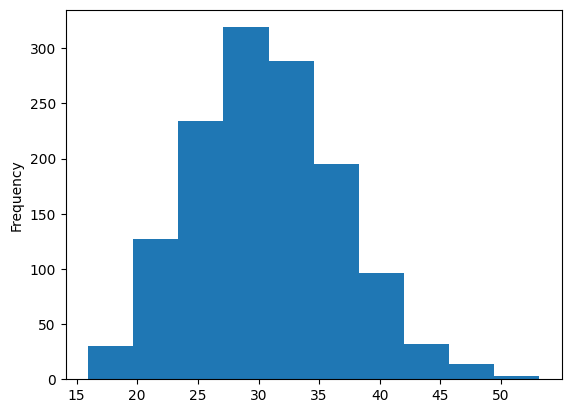

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["age"].value_counts()

,count
age,
18,69
19,68
50,29
51,29
47,29
46,29
45,29
20,29
48,29


##Prepare Data for standardization and normalisation.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),# turn all values in these columns between 0 & 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)
# Create X & y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#Build our train and test sets

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)



# Transform training and test data with normalisation (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
# What does our data look like now?
X.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
#Check shapes
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

The Data has been one-hot encoded and normalised, now let's try to build a neural network on it.

###Create Model 4

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
insurance_model_4= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=["mae"])
#fit the model

insurance_model_4.fit(tf.expand_dims(X_train_normal, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 13282.4883 - mae: 13282.4883
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12909.4580 - mae: 12909.4580
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11111.5508 - mae: 11111.5508
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8835.6416 - mae: 8835.6416
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8455.4004 - mae: 8455.4004
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8363.5332 - mae: 8363.5332
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8306.0566 - mae: 8306.0566
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8269.3926 - mae: 8269.3926
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8244.9678 - mae: 8244.9678
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8231.1543 - mae: 8231.1543
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8224.5107 - mae: 8224.5107
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

In [ ]:
# Evaluate our insurance model trained on normalised data
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 8783.1807 - mae: 8783.1807


[8639.6826171875, 8639.6826171875]

The model now performs much better than before so our changes were necessary to garner a better result.